In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [3]:
ribs = pd.read_csv("/mnt/shared_drive/data/brain_therapy/SMA02/RibsData-2019-08-01/data-1564687089470.csv")

In [4]:
ribs["sensor"] = ["PPG", "RSP", "EDA", "ECG", "Unknown_Sensor1", "SKT", "Unknown_Sensor2"]

In [5]:
ribs

,sensorblob_frequency,sensorblob_payload,sensor
0,500,"[0.4737548828125,0.4737548828125,0.47351074218...",PPG
1,500,"[0.45660400390625,0.456573486328125,0.45675659...",RSP
2,500,"[1.09344482421875,1.09375,1.09344482421875,1.0...",EDA
3,500,"[0.4861907958984375,0.487640380859375,0.489013...",ECG
4,500,"[0.36864,0.36865,0.36866,0.36867,0.36868,0.368...",Unknown_Sensor1
5,500,"[0.821533203125,0.82061767578125,0.82122802734...",SKT
6,0,"[-0.0011274899595450283,-0.0006245511110459662...",Unknown_Sensor2


In [6]:
data1 = ast.literal_eval(ribs.iloc[0]["sensorblob_payload"])

In [7]:
len(data1)/(500)/60

16.095333333333333

In [8]:
0.09533333333*60

5.719999999800001

## Whole Signal Plot

In [9]:
time_ = np.arange(0,1000,1/500)

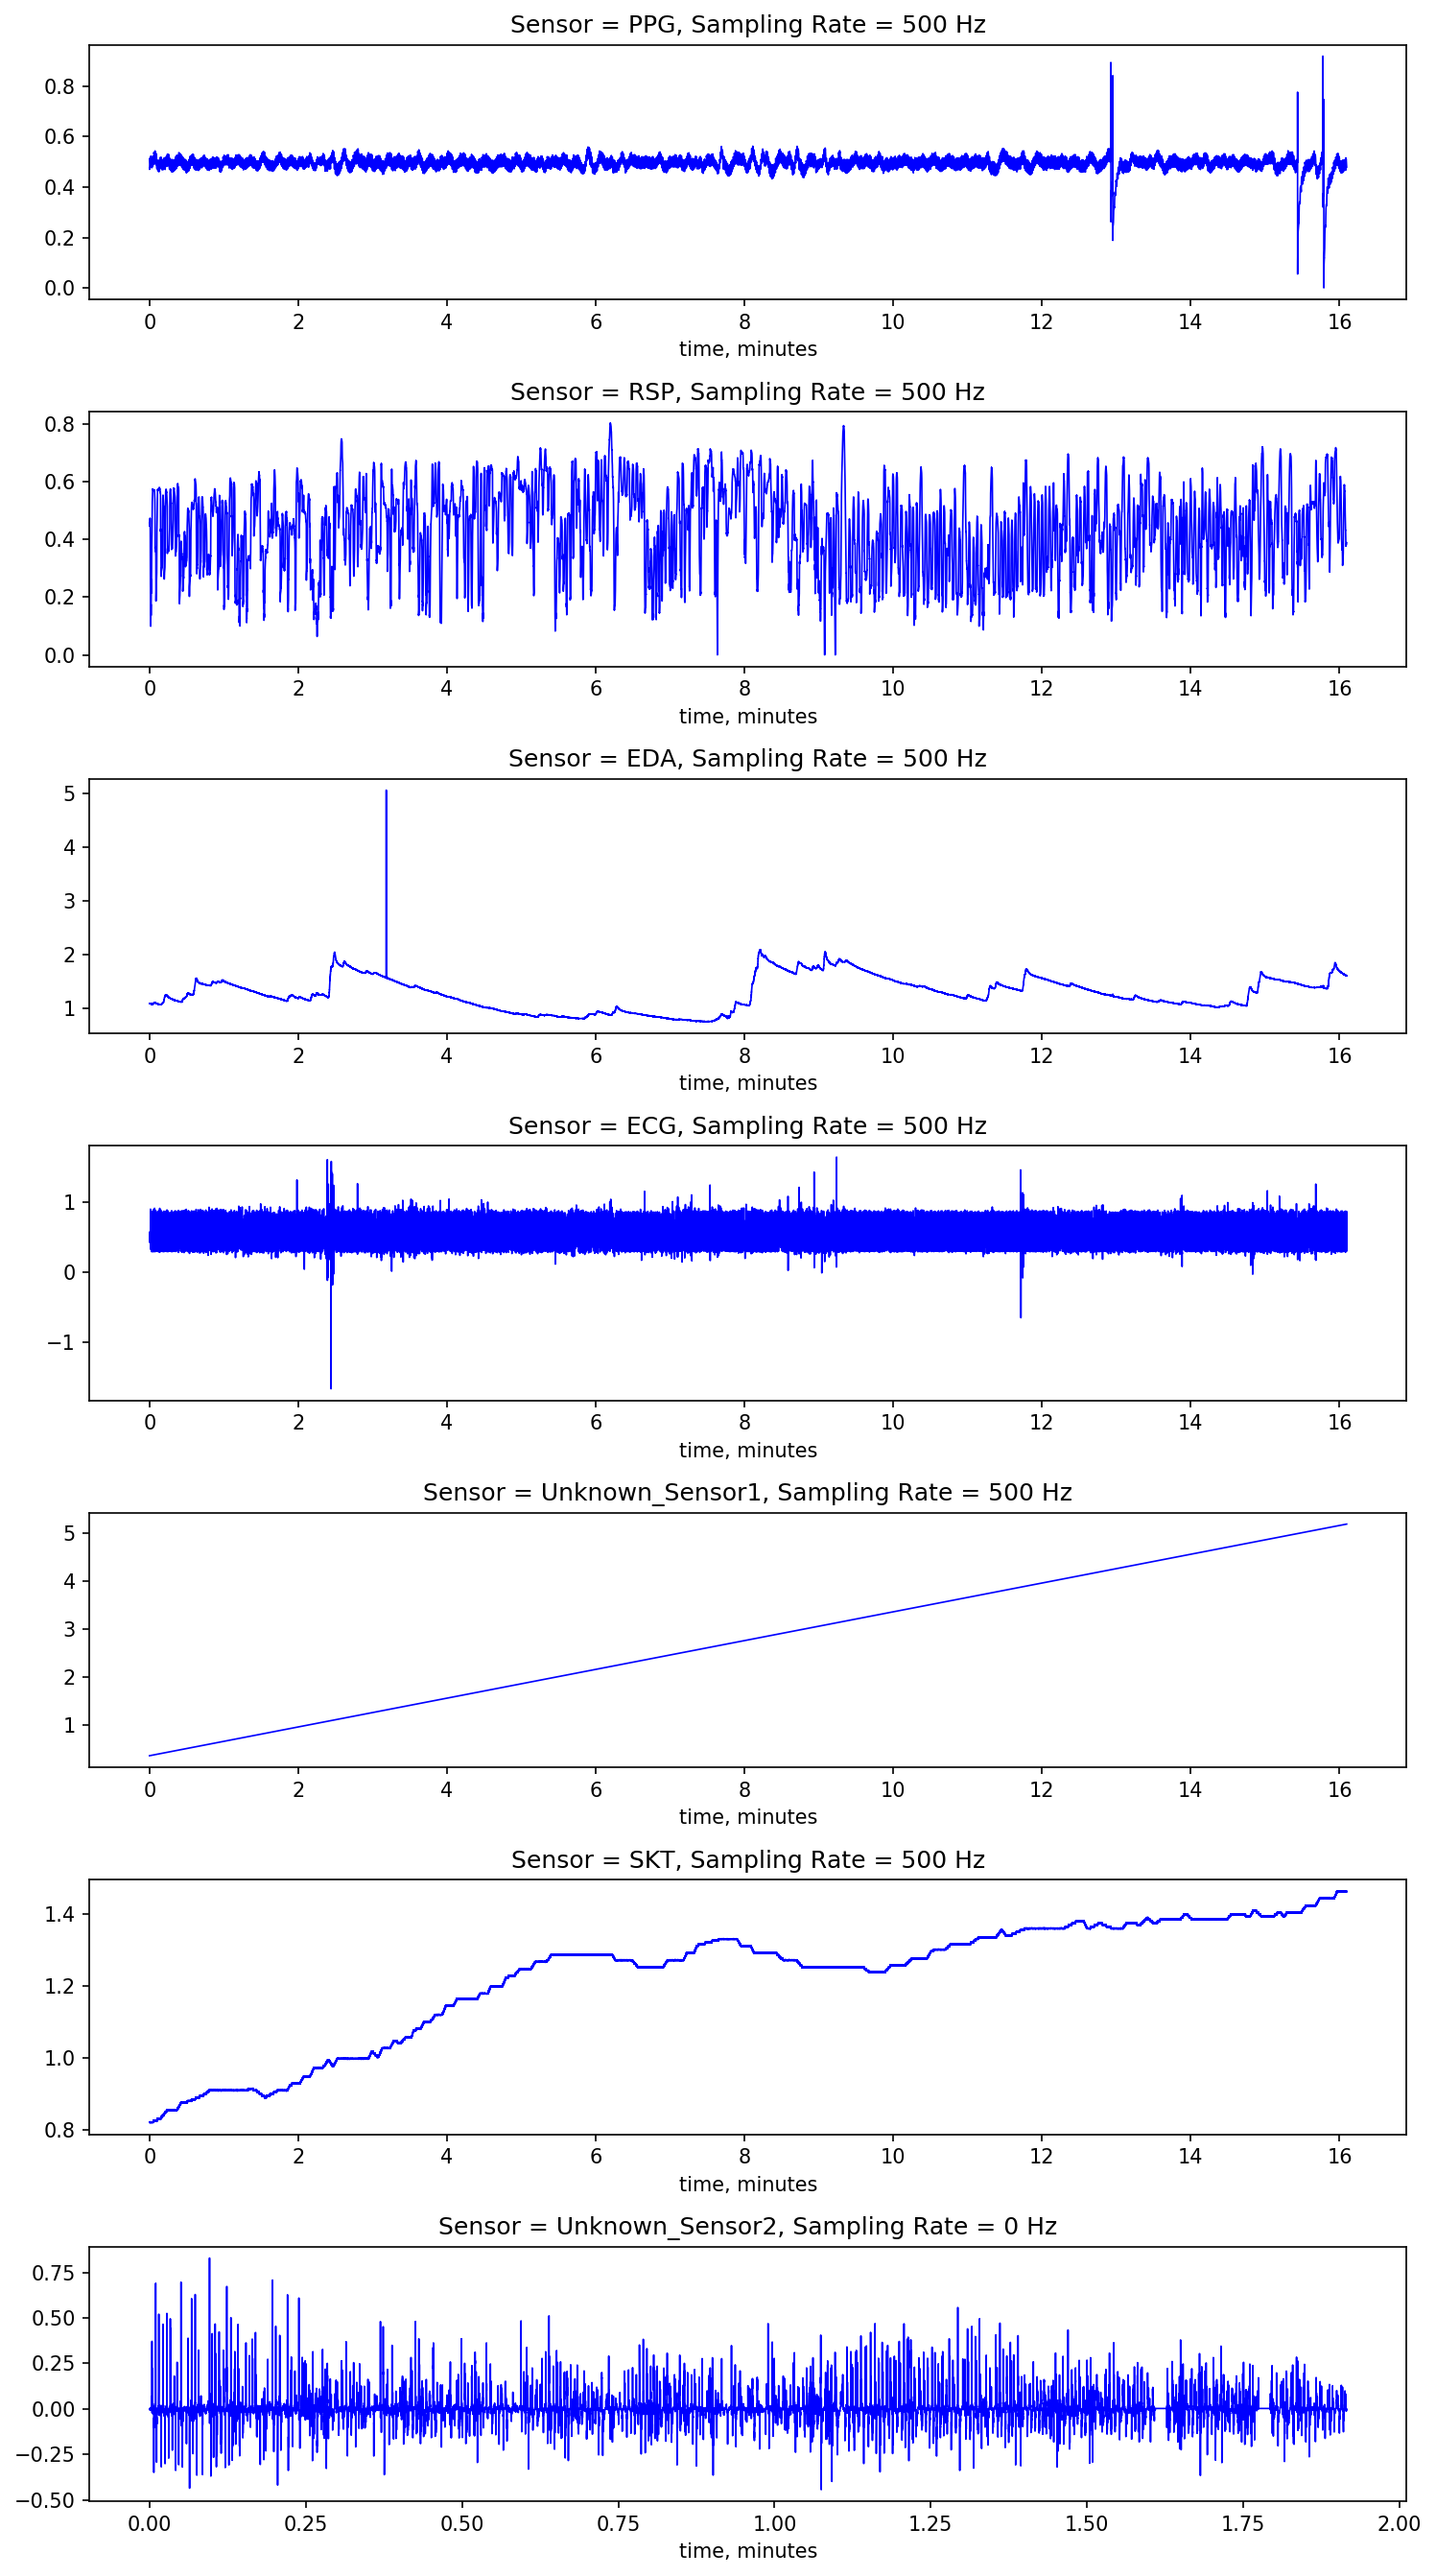

In [10]:
fig, axes = plt.subplots(7,1, figsize=(10,18), dpi = 150)
ax = axes.flatten()
for i in range(7):

    data = ast.literal_eval(ribs.iloc[i]["sensorblob_payload"])
    time_ = np.arange(0,len(data)/(500),1/500)
    ax[i].plot(time_/60, data, color = 'blue', lw=0.8)
    ax[i].set_xlabel("time, minutes")
    ax[i].set_title("Sensor = {}, Sampling Rate = {} Hz".format(ribs.iloc[i]["sensor"],ribs.iloc[i]["sensorblob_frequency"]))
plt.tight_layout()
plt.show()

## Zoomed in Signal Plots

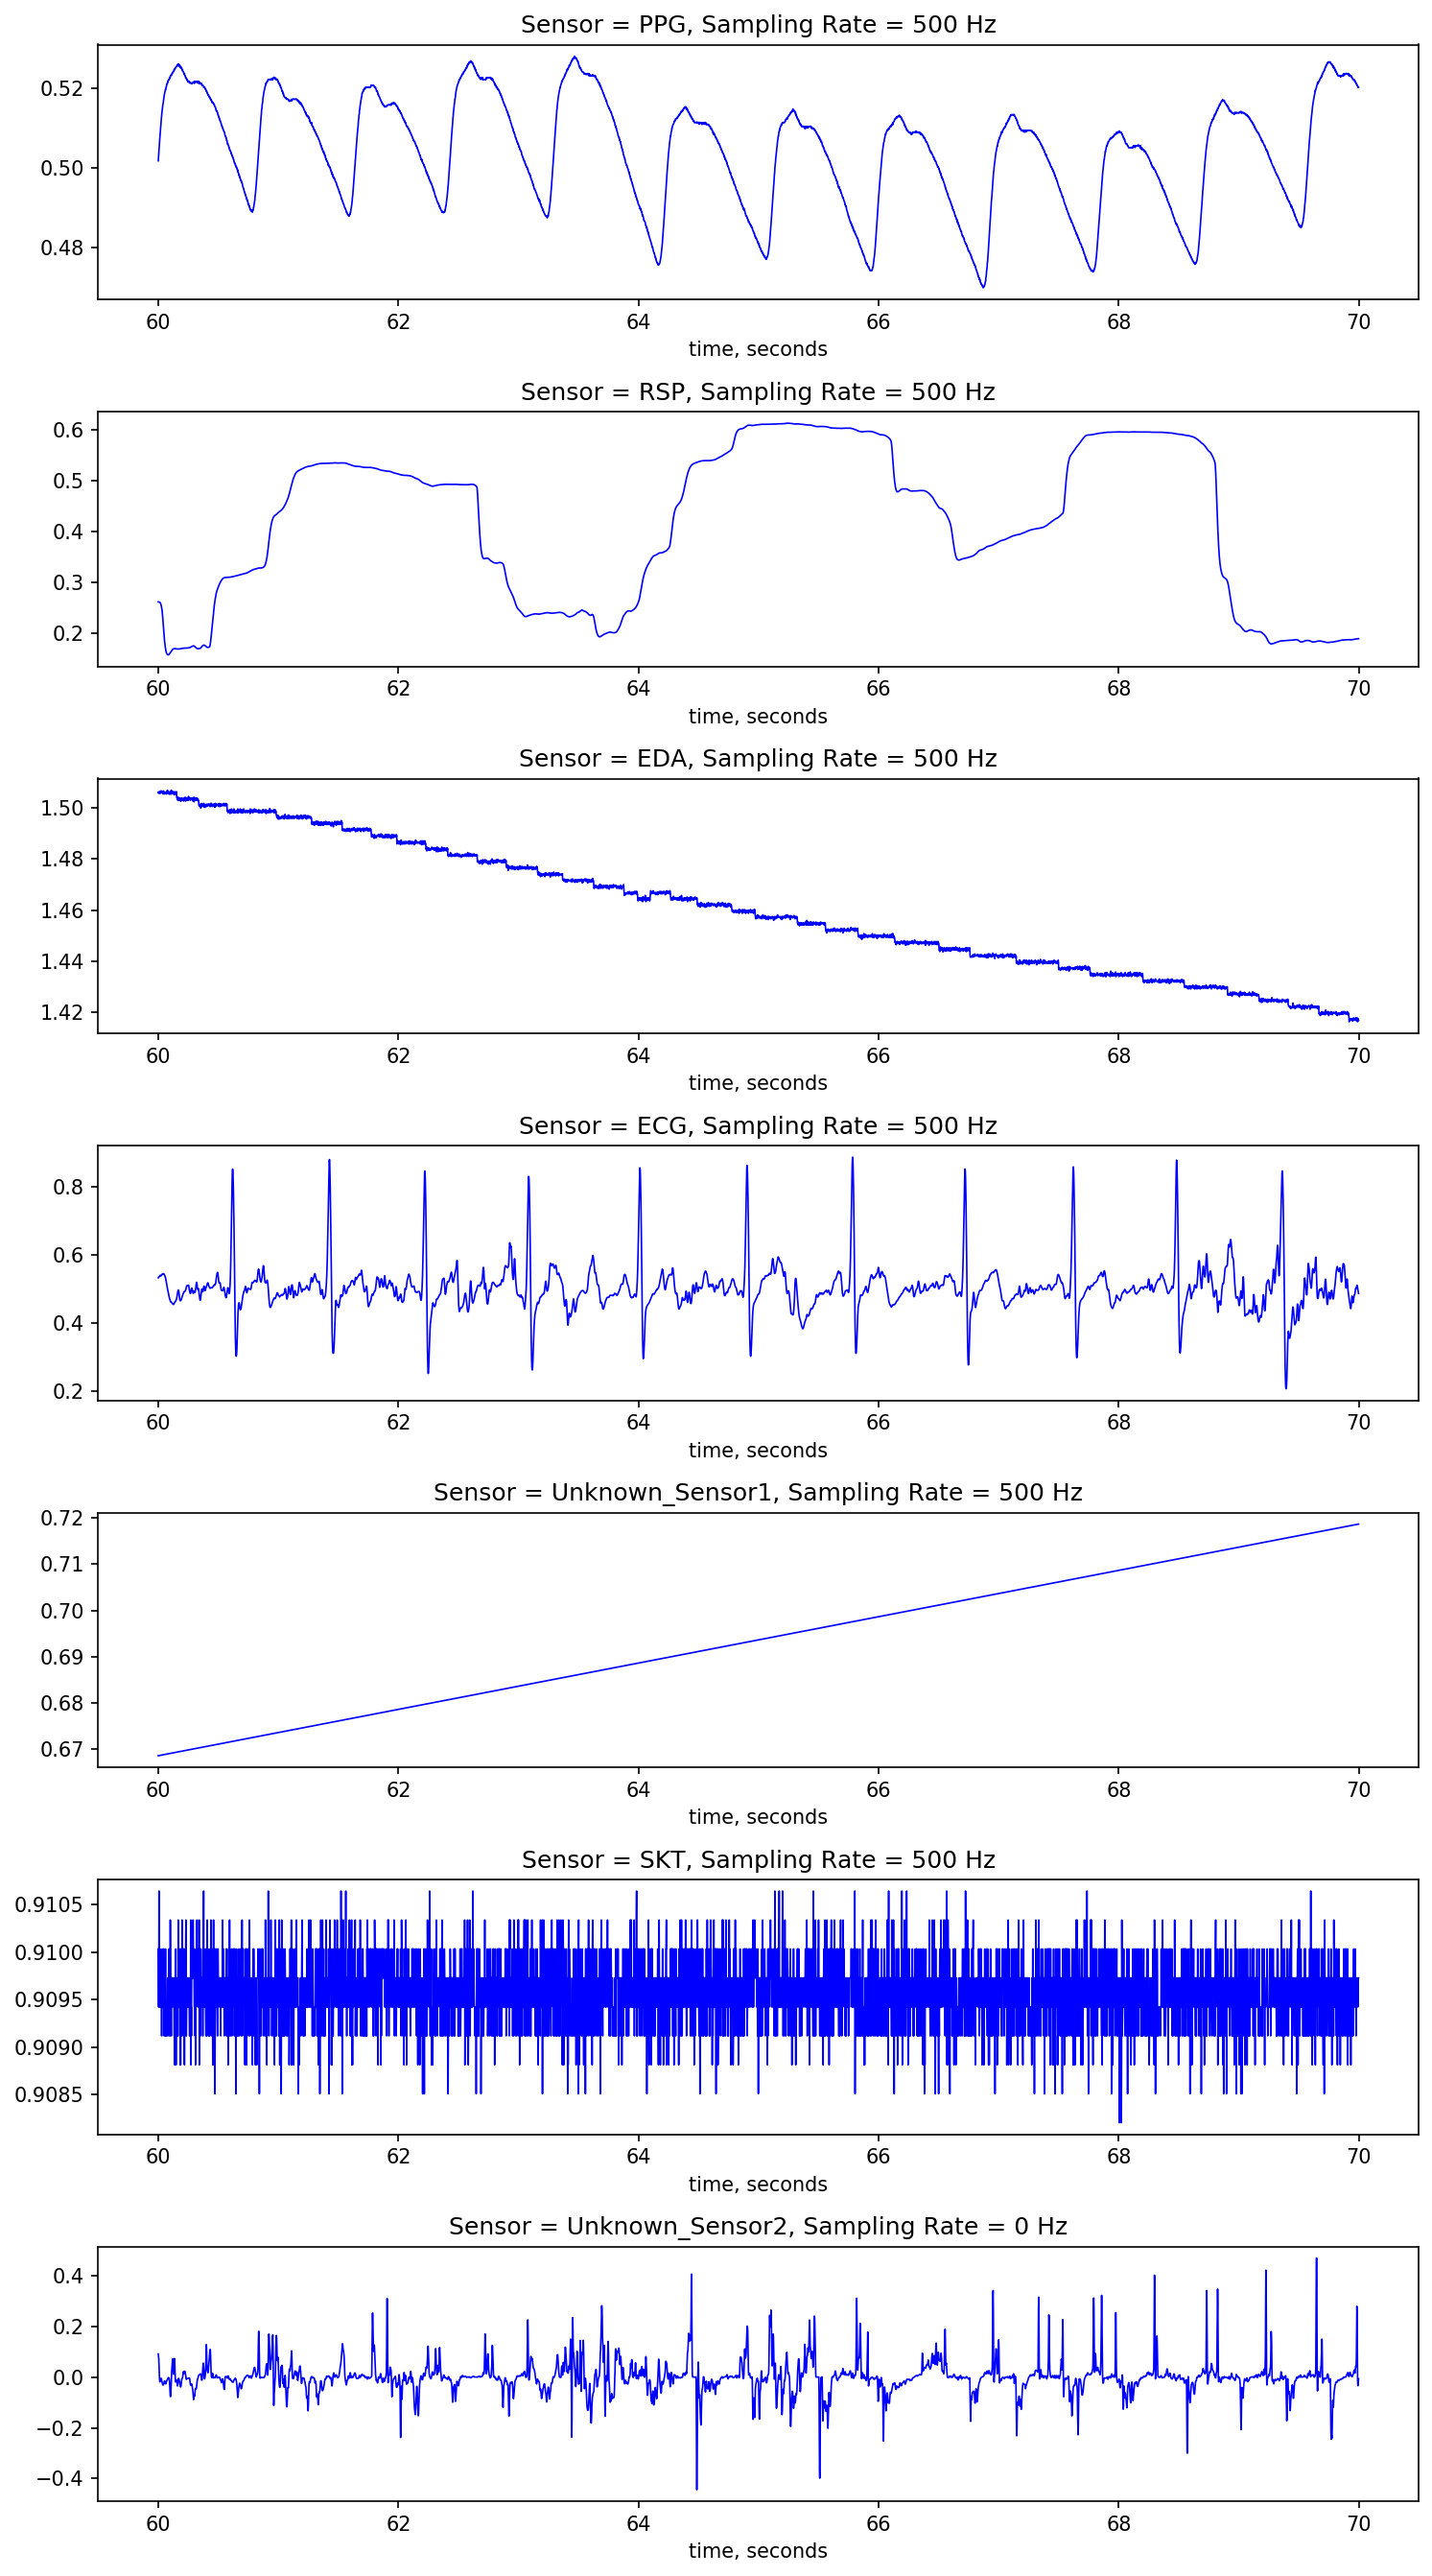

In [11]:
fig, axes = plt.subplots(7,1, figsize=(10,18), dpi = 150)
ax = axes.flatten()
for i in range(7):
    
    data = ast.literal_eval(ribs.iloc[i]["sensorblob_payload"])
    time_ = np.arange(0,len(data)/(500),1/500)
    
    data2 = data[500*60*1:500*60*1+500*10]
    time_2 = time_[500*60*1:500*60*1+500*10]
    ax[i].plot(time_2, data2, color = 'blue', lw=0.8)
    ax[i].set_title("Sensor = {}, Sampling Rate = {} Hz".format(ribs.iloc[i]["sensor"],ribs.iloc[i]["sensorblob_frequency"]))
    ax[i].set_xlabel("time, seconds")
plt.tight_layout()
plt.show()